In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib.ticker as ticker

## データインストールと前処理

In [3]:
df = pd.read_csv('サンプル - スーパーストア.xls - 注文.csv')
df['オーダー日'] = pd.to_datetime(df['オーダー日'])

In [4]:
df

,行 ID,オーダー ID,オーダー日,出荷日,出荷モード,顧客 ID,顧客名,顧客区分,市区町村,都道府県,国/地域,地域,製品 ID,カテゴリ,サブカテゴリ,製品名,売上,数量,割引率,利益
0,1,JP-2021-1000099,2021-11-08,2021/11/8,即日配送,谷大-14605,谷奥 大地,消費者,千歳市,北海道,日本,北海道,家具-本棚-10004817,家具,本棚,"Dania キャビネット, 従来型",16974.0,3,0.4,-1986.0
1,2,JP-2022-1001016,2022-10-07,2022/10/10,ファースト クラス,飯真-14980,飯沼 真,消費者,豊田市,愛知県,日本,中部地方,事務用-アプ-10001193,事務用品,アプライアンス,"フーバー ミキサー, シルバー",52224.0,8,0.0,25584.0
2,3,JP-2020-1001113,2020-08-18,2020/8/21,ファースト クラス,笹大-16015,笹淵 大輔,消費者,浜松市中区,静岡県,日本,中部地方,事務用-バイ-10002621,事務用品,バインダー,"カーディナル バインダー, エコノミー",3319.2,6,0.4,211.2
3,4,JP-2020-1001177,2020-11-25,2020/11/27,ファースト クラス,柿海-18790,柿下 海斗,小規模事業所,千歳市,北海道,日本,北海道,家具-椅子-10000770,家具,椅子,"Novimex 折り畳み式の椅子, 赤",16446.0,5,0.4,2466.0
4,5,JP-2020-1001177,2020-11-25,2020/11/27,ファースト クラス,柿海-18790,柿下 海斗,小規模事業所,千歳市,北海道,日本,北海道,家具-家具-10000840,家具,家具,"Eldon フレーム, 黒",18600.0,4,0.4,-3720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,JP-2022-3324130,2022-10-20,2022/10/24,通常配送,喜麗-15010,喜多川 麗華,大企業,富士市,静岡県,日本,中部地方,事務用-紙-10000929,事務用品,紙,"エナーマックス 事務用品, マルチカラー",13582.8,7,0.4,-7025.2
9996,9997,JP-2022-3324130,2022-10-20,2022/10/24,通常配送,喜麗-15010,喜多川 麗華,大企業,富士市,静岡県,日本,中部地方,家具-家具-10002966,家具,家具,"Eldon フレーム, 高耐久性",22656.0,5,0.4,-4534.0
9997,9998,JP-2022-2560725,2022-10-15,2022/10/17,ファースト クラス,皆学-10465,皆川 学,消費者,川西市,兵庫県,日本,関西地方,事務用-画材-10002208,事務用品,画材,"Stanley キャンバス, 大容量パック",13264.0,4,0.0,4240.0
9998,9999,JP-2022-1550839,2022-11-19,2022/11/25,通常配送,阿真-11125,阿藤 真,小規模事業所,尾道市,広島県,日本,中国地方,家電-電話-10002395,家電,電話機,"ノキア 信号ブースター, 各種サイズ",65030.0,7,0.0,595.0


# 作図

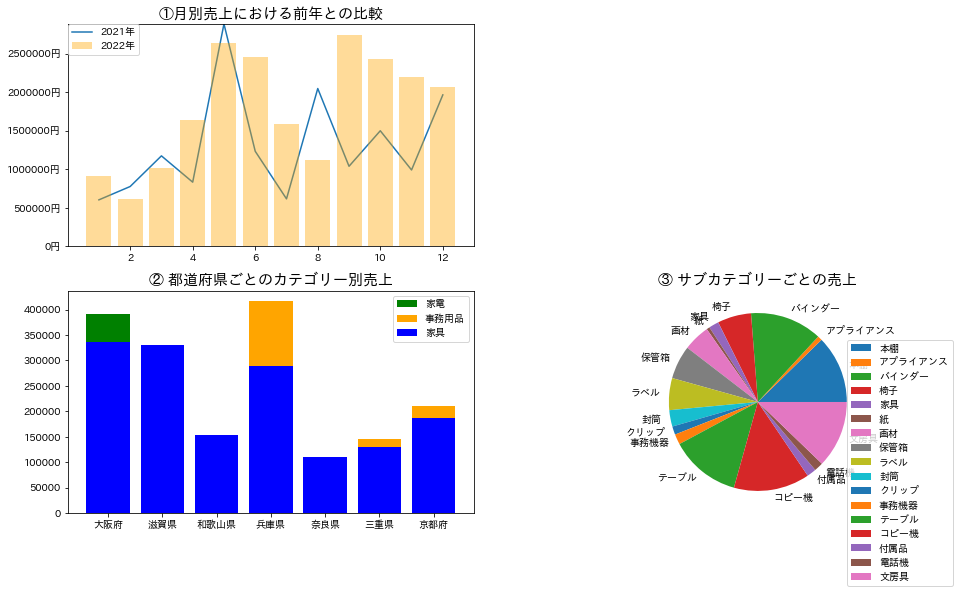

In [5]:
# 全体を作る図を作成
fig = plt.figure(figsize=(16,9))

# ① 月別売上を前年との比較
ax1 = fig.add_subplot(2, 2, 1)
ax2 = ax1.twinx()
ax1.plot(df[(df['地域']=='関西地方')&((df['オーダー日']>='2021-01-01')&(df['オーダー日']<='2021-12-31'))].groupby(pd.Grouper(key="オーダー日", freq="M")).sum().index.month
    , df[(df['地域']=='関西地方')&((df['オーダー日']>='2021-01-01')&(df['オーダー日']<='2021-12-31'))].groupby(pd.Grouper(key="オーダー日", freq="M")).sum()['売上'], label="2021年")
ax2.bar(df[(df['地域']=='関西地方')&((df['オーダー日']>='2022-01-01')&(df['オーダー日']<='2022-12-31'))].groupby(pd.Grouper(key="オーダー日", freq="M")).sum().index.month
    , df[(df['地域']=='関西地方')&((df['オーダー日']>='2022-01-01')&(df['オーダー日']<='2022-12-31'))].groupby(pd.Grouper(key="オーダー日", freq="M")).sum()['売上'], label="2022年",
        alpha=0.4, color='orange')
plt.title("①月別売上における前年との比較", fontsize=15)

handler1, label1 = ax1.get_legend_handles_labels()# label1と2には、凡例用に各labelのリスト情報が入る
handler2, label2 = ax2.get_legend_handles_labels()

ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d円"))# 　軸の目盛りの単位を変更する

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)# 凡例をまとめて出力する
ax1.set_ylim([0, df[(df['地域']=='関西地方')&((df['オーダー日']>='2021-01-01')&(df['オーダー日']<='2021-12-31'))].groupby(pd.Grouper(key="オーダー日"
                                                                                                                     , freq="M")).sum()['売上'].max() ])

ax2.axis("off")# 2022年のY軸は不要なので削除

# ② 都道府県ごとのカテゴリー別売上
ax3 = fig.add_subplot(2, 2, 3)
p1 = ax3.bar(df[(df['地域']=='関西地方') &(df['カテゴリ']=='家電')]['都道府県'], df[(df['地域']=='関西地方') &(df['カテゴリ']=='家電')]['売上'], color="green")
p2 = ax3.bar(df[(df['地域']=='関西地方') &(df['カテゴリ']=='事務用品')]['都道府県'], df[(df['地域']=='関西地方') &(df['カテゴリ']=='事務用品')]['売上'] 
             ,color="orange")
p3 = ax3.bar(df[(df['地域']=='関西地方') &(df['カテゴリ']=='家具')]['都道府県'], df[(df['地域']=='関西地方') &(df['カテゴリ']=='家具')]['売上'] 
             , color="blue")
ax3.legend((p1[0], p2[0],p3[0]), ("家電", "事務用品",'家具'))
plt.title("② 都道府県ごとのカテゴリー別売上", fontsize=15)
# ③ サブカテゴリーごとの売上
ax4 =fig.add_subplot(2, 2, 4)
ax4.pie(df.groupby(['サブカテゴリ']).sum()['売上'], labels=df['サブカテゴリ'].unique(),)
plt.title("③ サブカテゴリーごとの売上", fontsize=15)
ax4.legend(loc='best', bbox_to_anchor=(0.6, 0, 0.8, 0.8))
plt.savefig('./fig/matplotlib.png')